# 분류 모델
- 분류(classification): 카테고리 구분을 예측하는 것
- 키와 몸무게를 보고 남여 성별을 예측하는 모델을 만들어 본다
- 컨퓨전 매트릭스를 이해하고 분류의 성능 지표인 정확도(accuracy), 정밀도(precision), 리콜(recall), f-1 점수를 알아본다 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler


## 데이터 다운로드
- 남여 성별, 키, 몸무게 데이터

In [9]:
data = pd.read_csv("https://github.com/data-labs/data/raw/main/weight-height.csv")
print(data.shape)
data[:5]

(10000, 3)


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [10]:
# 성별 인코딩, 단위 변환 (인치, 파운드 --> cm, kg)
data.Gender = data.Gender.map({'Male':0, 'Female':1})
data.Height = data.Height*2.54 # cm
data.Weight = data.Weight*0.453592 # kg
data[:5]

,Gender,Height,Weight
0,0,187.571423,109.720985
1,0,174.706036,73.622732
2,0,188.239668,96.497550
3,0,182.196685,99.809504
4,0,177.499761,93.598619


In [11]:
# 사본 사용 (원본 백업)
df = data.copy()

## 데이터 특성

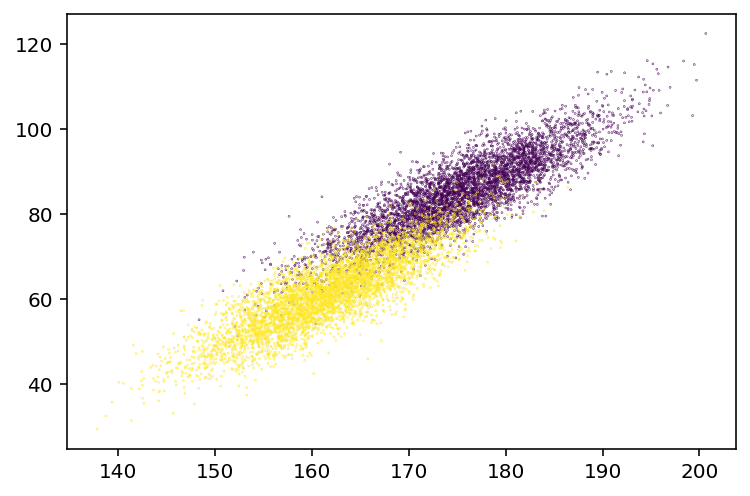

In [12]:
# 남성(0)은 갈색, 여성(1)은 노란색
plt.scatter(df.Height,df.Weight,c=df.Gender,s=0.05)

##  성별  예측
- X: 키와 몸무게 (2개의 특성을 사용)
- y: 성별 (남여를 구분하는 이진 분류 문제)

In [13]:
X = df[["Height", "Weight"]]
y = df.Gender

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((7500, 2), (2500, 2), (7500,), (2500,))

In [17]:
# 선형 분류 모델 생성, 학습 및 평가
# 분류 모델에서 score함수는 정확도(accuracy)를 알려준다
# 선형 분류 모델로 SGDClassifier 사용
model = SGDClassifier() # (1) 모델 생성
model.fit(X_train, y_train) # (2) 훈련
model.score(X_test, y_test) # (3) 평가 (정확도)

0.902

In [20]:
cross_val_score(model, X, y, cv=5) # 교차검증

array([0.8455, 0.8695, 0.8705, 0.919 , 0.916 ])

### 모델 파라미터

In [23]:
model.coef_, model.intercept_

(array([[ 27.33156427, -66.79901357]]), array([133.18319884]))

In [24]:
a1, a2 = model.coef_[0][0], model.coef_[0][1]
b = model.intercept_

### 이진 분류를 위한 결정 경계 (decision boundary)
- 하나의 변수만 사용하는 경우 선형분류 결정 경계: $x_{1} > b$  
- 두 개의 변수를 사용하는 경우 선형분류 결정 경계: $a_{1}x_{1}+a_{2}x_{2}+b >0$  
     > $x_{2} > -$$a_{1}\over a_{2}$ $x_{1} - $$b\over{a_{2}}$


<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-09%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%205.19.06.png?raw=1" width=500 align='left'>


(130.0, 210.0)

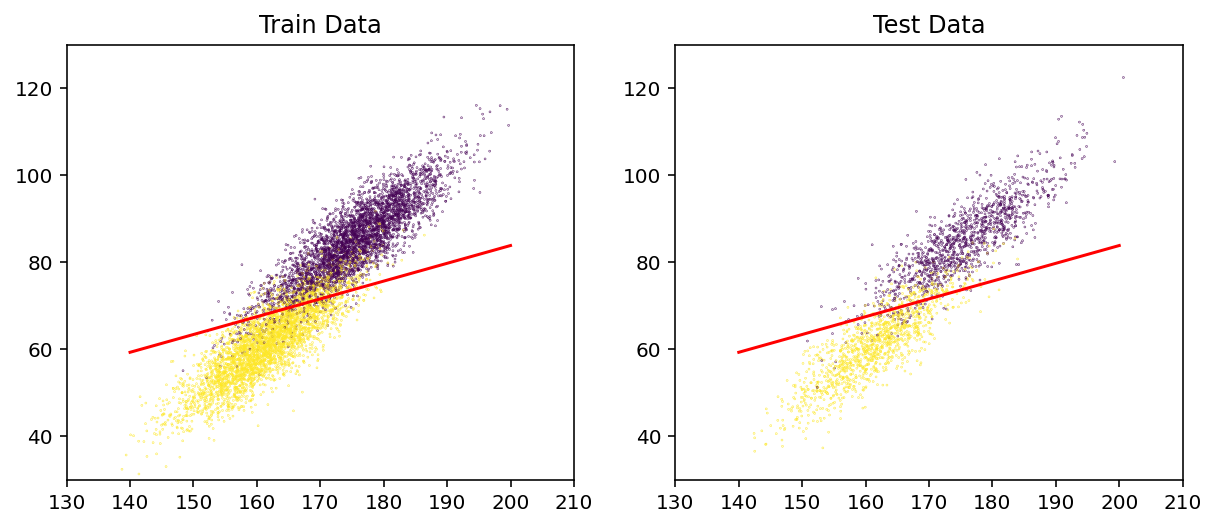

In [25]:
# 성별 예측 결정 경계 그리기
plt.figure(figsize=(10,4))

xs = np.linspace(140,200,2)
ys = -(a1/a2)*xs - b/a2

plt.subplot(1,2,1)  
plt.title('Train Data')
plt.plot(xs,ys, c='r')
plt.scatter(X_train.Height,X_train.Weight, c=y_train, s=0.05)
plt.ylim([30,130])
plt.xlim([130,210])

plt.subplot(1,2,2)  
plt.title('Test Data')
plt.plot(xs,ys, c='r')
plt.scatter(X_test.Height,X_test.Weight, c=y_test, s=0.05)
plt.ylim([30,130])
plt.xlim([130,210])

## 스케일링 수행

In [26]:
df_sc = df.copy()
scale = StandardScaler()
df_sc[["Height", "Weight"]] = scale.fit_transform(df[["Height", "Weight"]])
X_sc = df_sc[["Height", "Weight"]]
y = df_sc.Gender

x_train, x_test, y_train, y_test = train_test_split(X_sc, y ,random_state=19)
model = SGDClassifier() # (1) 모델 생성
model.fit(x_train, y_train) # (2) 학습
model.score(x_test, y_test) # (3) 이용, 성능평가

0.9136

In [27]:
cross_val_score(model, X_sc, y, cv=10).mean()

0.9174

# 성능 평가

In [30]:
y_test[:10]

1921    0
530     0
3931    0
8585    1
1937    0
4932    0
3450    0
3399    0
6473    1
4557    0
Name: Gender, dtype: int64

In [31]:
# 성별 예측치
y_pred = model.predict(x_test)
y_pred[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [33]:
# 결과 비교표
result = pd.DataFrame({"예측치":y_pred, "실제값":y_test})
print(result.shape)
result[:20]

(2500, 2)


,예측치,실제값
1921,0,0
530,0,0
3931,0,0
8585,1,1
1937,0,0
4932,0,0
3450,0,0
3399,0,0
6473,1,1
4557,0,0


In [34]:
# 정확도를 구하는 다른 방법 (위 score()의 결과와 비교)
(y_pred == y_test).mean()

0.9136

## 컨퓨전 매트릭스
- 분류의 성능을 평가하려면 먼저 컨퓨전 매트릭스를 이해해야 한다

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-07%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.44.12.png?raw=1" width=450 align='left'>



##  이진 분류 컨퓨전 매트릭스 예시
 - 총 100명을 진단하고 9명을 양성이라고 예측했으나 실제로 양성은 6명, 음성은 3명
 - 91명을 음성이라고 예측했으나 실제로 음성은 87명, 양성은 4명
 
<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-07%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.49.05.png?raw=1" width=450 align='left'>

## 분류 기본 성능 평가
- Accuracy (정확도): 전체 맞춘 비율 (TP+TP) / (TP+FP+FN+FP)
- Precision: positive로 예측한 것 중 실제로 맞는 비율, TP / (TP+FP) 
- Recall (Sensitivity):  전체 positive 중 모델이 찾아낸 비율, TP / (TP+FN)
- f1-score: Precision과 Recall의 조화 평균 (2 x  Precision x Recall) /  (Precision + Recall)

- Accuracy (정확도): 93/100
- Precision: 6/9
- Recall (Sensitivity):  6/10

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-07%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.56.47.png?raw=1" width = 530 align='left'>

## 10명의 환자를 검진한 결과 예

In [25]:
np.random.seed(19)
# 10명 환자에 대한 의사의 검사 점수가 아래와 같다고 배정 (랜덤)
# 점수가 클수록 암일 가능성이 높은 것임
raw_scores = np.random.randint(30,99,10)
raw_scores

array([70, 49, 82, 61, 96, 86, 52, 64, 35, 40])

In [26]:
# 환자 명단(id)과 검사 점수 
df = pd.DataFrame({"점수":raw_scores})
df

,점수
0,70
1,49
2,82
3,61
4,96
5,86
6,52
7,64
8,35
9,40


In [27]:
# 암환자를 판정하기 위해서 점수순으로 소팅 (인덱스도 같이 소팅된다)
df = df.sort_values(['점수'], ascending=False)
df

,점수
4,96
5,86
2,82
0,70
7,64
3,61
6,52
1,49
9,40
8,35


In [28]:
# 의사의 암진단은 이진분류이므로, 암으로 판정하는 기준 점수(threshold)를 정해야 함(65점이라고 가정)
# 암 진단 대상자 표시
threshold =  65
pred_cancer = df["점수"] > threshold
pred_cancer

4     True
5     True
2     True
0     True
7    False
3    False
6    False
1    False
9    False
8    False
Name: 점수, dtype: bool

In [29]:
# 진단 컬럼을 추가 (불리언을 숫자로 변환), 10명중 4명이 암이라고 진단함
df["진단"] = pred_cancer.astype(int)
df

,점수,진단
4,96,1
5,86,1
2,82,1
0,70,1
7,64,0
3,61,0
6,52,0
1,49,0
9,40,0
8,35,0


### 실제 암 발생 데이터
- 위의 점수순 환자 명단에서, 실제로 암 발생 여부(ground-truth)가 아래와 같다고 가정
 - 나중에 정밀 검사를 해서 알아낸 것

In [30]:
# 실제로 암 발생 결과 (암 발생이면 1)
df['실제암발생'] = np.array([1,1,0,1,0,1,1,0,0,0])
df

,점수,진단,실제암발생
4,96,1,1
5,86,1,1
2,82,1,0
0,70,1,1
7,64,0,0
3,61,0,1
6,52,0,1
1,49,0,0
9,40,0,0
8,35,0,0


### 컨퓨전 매트릭스와 기본 성능 평가

In [31]:
# 예측치와 실제값
y_pred = df['진단']
y_test = df['실제암발생']

In [32]:
# 컨퓨전 매트릭스를 얻는 함수: confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[4 1]
 [2 3]]


### (주의!) 컴퓨터는 0, 1 순으로 매트릭스를 표현
- 편의상 positive를 1로 표현하고 매트릭스의 (0, 0) 위치에 기록하는 경우가 많으나 컴퓨터가 생성하는 매트릭스는 우-하 단이 1인 것에 주의해야 함

In [33]:
# 위와 같은 진단 결과에 대한 기본 성능 지표 보기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.75      0.60      0.67         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



- support는 분석에 사용된 샘플수
- macro 평균은 성능평가 점수들을 0, 1 케이스에 대해서 1:1로 산술평균을 구한 것
- weighted 평균은 샘플의 갯수를 고려하여 0, 1 케이스에 대해서 가중평균을 구한 것

- Accuracy (정확도): 전체 맞춘 비율
- Precision: positive로 예측한 것중 실제로 맞는 비율, TP / ( TP + FP ) 
- Recall (Sensitivity):  전체 positive 중 모델이 찾아낸 비율, TP / (TP+FN)
- f1-score: Precision과 Recall의 조화 평균 (2 x  Precision x Recall ) /  (Precision + Recall)

### (참고) 조화평균
- f-1 점수는 정밀도와 리콜의 조화평균(harmonic average)이다

- 점수들이 조화로울수록 (서로 차이가 작을수록) 조화평균 점수가 높다

- a, b의 산술 평균, $c = $${(a + b)}\over {2}$
- a, b의 조화 평균 $c$, ${1}\over{c}$ =  ($1\over{a}$+${1}\over{b}$) $/ 2$   
> $c = $ ${2ab}\over{(a+b)}$

In [34]:
# 예: 학생 3명의 국어, 수학 성적
df1 = pd.DataFrame({"국어": [20, 40, 60, 80], "수학": [100, 80, 60, 40]})
df1

,국어,수학
0,20,100
1,40,80
2,60,60
3,80,40


In [35]:
# 산술평균과 조화평균을 비교
# 산술평균(arithmetic average)은 조화를 측정하지 못한다

df1["산술평균"] = (df1['국어']+df1['수학'])/2
df1["조화평균"] = 2*df1['국어']*df1['수학']/(df1['국어']+df1['수학'])
df1.round(1)

,국어,수학,산술평균,조화평균
0,20,100,60.0,33.3
1,40,80,60.0,53.3
2,60,60,60.0,60.0
3,80,40,60.0,53.3


## 남여 성별 구분 문제
- 선형 모델

In [35]:
df = data.copy()
X = df[["Height", "Weight"]]
y = df.Gender
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = SGDClassifier() # (1) 모델 생성
model.fit(X_train, y_train) # (2) 훈련
model.score(X_test, y_test) # (3) 평가 (정확도)

0.8984

In [36]:
def show_clf_result(y_test_sex, y_pred_sex):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [37]:
y_pred = model.predict(X_test)
show_clf_result(y_test, y_pred)

[[1061  210]
 [  44 1185]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1271
           1       0.85      0.96      0.90      1229

    accuracy                           0.90      2500
   macro avg       0.90      0.90      0.90      2500
weighted avg       0.91      0.90      0.90      2500



In [39]:
model.decision_function(X_test) # 선형모델, SVM
# predict_proba() 트리계열, 랜덤포레스트, 부스팅, 로지스틱회귀, 신경망

array([-144.36827433,  894.44753911,  649.21745488, ..., -314.8936934 ,
        -49.85956351,  875.01511249])

In [40]:
df1 = X_test.copy()
df1["score"] = model.decision_function(X_test)
df1

,Height,Weight,score
3288,172.019422,79.954275,-144.368274
6465,154.858230,52.390996,894.447539
7515,160.878499,59.754933,649.217455
9070,155.481450,61.214627,452.285245
9218,164.179255,71.174590,133.098752
...,...,...,...
6603,156.853025,51.258734,997.880776
8973,151.137516,49.883337,940.357735
2322,176.502687,85.204197,-314.893693
1601,175.846150,79.792090,-49.859564


In [43]:
N=100
df2 = df1[:N]
df2

,Height,Weight,score
3288,172.019422,79.954275,-144.368274
6465,154.858230,52.390996,894.447539
7515,160.878499,59.754933,649.217455
9070,155.481450,61.214627,452.285245
9218,164.179255,71.174590,133.098752
...,...,...,...
8844,154.238897,47.028362,1157.761147
8678,168.751403,69.430421,326.173493
1162,166.312151,75.592986,-47.333090
9376,162.717584,63.693829,486.963660


(140.0, 200.0)

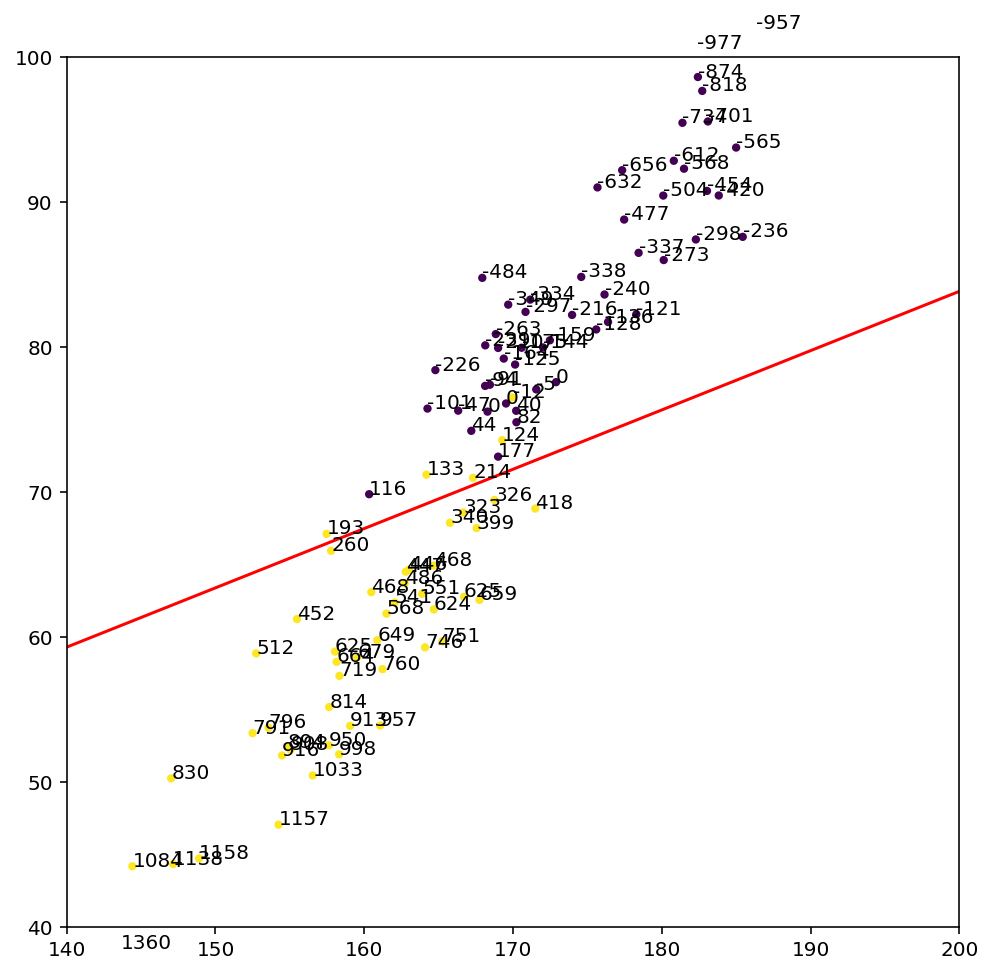

In [44]:
# 성별 예측 점수 보기
plt.figure(figsize=(8,8))

xs = np.linspace(140,200,2)
ys = -(a1/a2)*xs - b/a2
plt.plot(xs,ys, c='r')
plt.scatter(df2.Height,df2.Weight, c=y_test[:N], s=10)
for i in range(N):
    plt.text(df2.Height.iloc[i],df2.Weight.iloc[i], 
             df2.score.values.astype(int).astype(str)[i],fontsize=10)
plt.ylim([40,100])
plt.xlim([140,200])

In [ ]:
# 과제: 검증데이터중 100명을 산포도로 그리고, 잘못 분류된 사람들의 샘플들을 출력한다 (인덱스를 먼저 구한다)

In [68]:
(model.predict(X_test) != y_test).index

Int64Index([3288, 6465, 7515, 9070, 9218, 3464, 2353, 3864, 1826, 9987,
            ...
              81, 3229, 8058, 6904, 1003, 6603, 8973, 2322, 1601, 7022],
           dtype='int64', length=2500)

In [67]:
X_test[(model.predict(X_test) != y_test)].index

Int64Index([4377, 4019,  107, 8404, 3682, 2720, 4823, 3159, 1261,  617,
            ...
            9826, 4334, 9846, 7166, 4579,  606, 6632, 8182,  706, 3229],
           dtype='int64', length=254)